In [1]:
#Install all the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [4]:
#Store the data into the data frame
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-11,428.200012,445.570007,424.160004,425.559998,425.559998,7462900
1,2020-06-12,429.000000,434.059998,412.450012,418.070007,418.070007,6461100
2,2020-06-15,421.399994,426.489990,415.420013,425.500000,425.500000,4467900
3,2020-06-16,425.760010,437.959991,425.179993,436.130005,436.130005,5507900
4,2020-06-17,441.820007,450.459991,439.220001,447.769989,447.769989,6529600
5,2020-06-18,448.730011,452.760010,442.799988,449.869995,449.869995,4277600


In [5]:
#Get the number of trading days
df.shape

(253, 7)

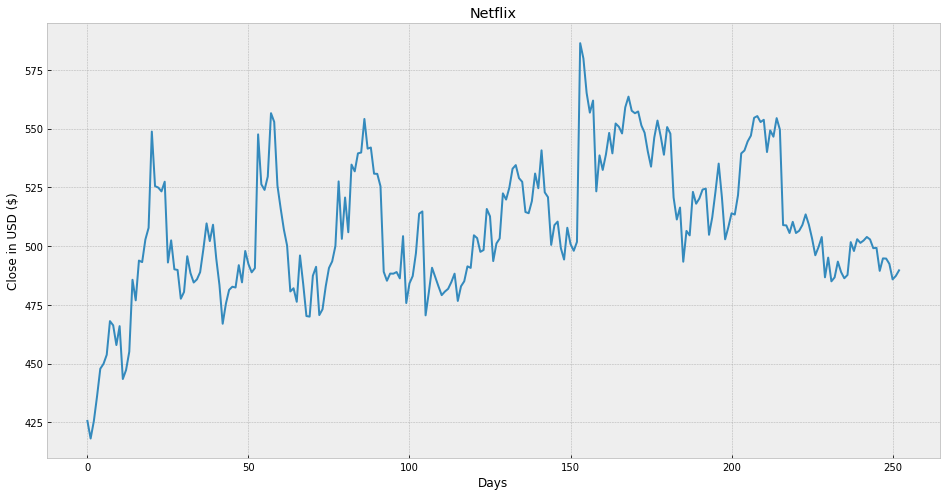

In [9]:
#Visualize the close price data
plt.figure(figsize=(16, 8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close in USD ($)')
plt.plot( df['Close'] ) 
plt.show()

In [10]:
#Get the close
df = df[['Close']]
df.head(4)

,Close
0,425.559998
1,418.070007
2,425.500000
3,436.130005


In [12]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
249,492.390015,NaN
250,485.809998,NaN
251,487.269989,NaN
252,489.654999,NaN


In [13]:
#Create the feature data set (X) and convert it to a numpy array and remove the 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[425.559998]
 [418.070007]
 [425.5     ]
 [436.130005]
 [447.769989]
 [449.869995]
 [453.720001]
 [468.040009]
 [466.26001 ]
 [457.850006]
 [465.910004]
 [443.399994]
 [447.23999 ]
 [455.040009]
 [485.640015]
 [476.890015]
 [493.809998]
 [493.160004]
 [502.779999]
 [507.76001 ]
 [548.72998 ]
 [525.5     ]
 [524.880005]
 [523.26001 ]
 [527.390015]
 [492.98999 ]
 [502.410004]
 [490.100006]
 [489.820007]
 [477.579987]
 [480.450012]
 [495.649994]
 [488.51001 ]
 [484.480011]
 [485.799988]
 [488.880005]
 [498.619995]
 [509.640015]
 [502.109985]
 [509.079987]
 [494.730011]
 [483.380005]
 [466.929993]
 [475.470001]
 [481.329987]
 [482.679993]
 [482.350006]
 [491.869995]
 [484.529999]
 [497.899994]
 [492.309998]
 [488.809998]
 [490.579987]
 [547.530029]
 [526.27002 ]
 [523.890015]
 [529.559998]
 [556.549988]
 [552.840027]
 [525.75    ]
 [516.049988]
 [507.019989]
 [500.190002]
 [480.670013]
 [482.029999]
 [476.26001 ]
 [495.98999 ]
 [483.859985]
 [470.200012]
 [469.959991]
 [487.350006]
 [491.

In [14]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[492.98999  502.410004 490.100006 489.820007 477.579987 480.450012
 495.649994 488.51001  484.480011 485.799988 488.880005 498.619995
 509.640015 502.109985 509.079987 494.730011 483.380005 466.929993
 475.470001 481.329987 482.679993 482.350006 491.869995 484.529999
 497.899994 492.309998 488.809998 490.579987 547.530029 526.27002
 523.890015 529.559998 556.549988 552.840027 525.75     516.049988
 507.019989 500.190002 480.670013 482.029999 476.26001  495.98999
 483.859985 470.200012 469.959991 487.350006 491.170013 470.609985
 473.079987 482.880005 490.649994 493.480011 500.029999 527.51001
 503.059998 520.650024 505.869995 534.659973 531.789978 539.440002
 539.809998 554.090027 541.450012 541.940002 530.789978 530.719971
 525.419983 489.049988 485.230011 488.279999 488.23999  488.929993
 486.23999  504.209991 475.73999  484.119995 487.220001 496.950012
 513.76001  514.72998  470.5      480.23999  490.76001  486.769989
 482.839996 479.100006 480.630005 481.790009 484.670013 488.23999

In [15]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [16]:
#Create the models
#Create the Decision Tree Regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [18]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[539.419983],
       [540.669983],
       [544.530029],
       [546.98999 ],
       [554.580017],
       [555.309998],
       [552.780029],
       [553.72998 ],
       [540.02002 ],
       [549.219971],
       [546.539978],
       [554.440002],
       [549.570007],
       [508.899994],
       [508.779999],
       [505.549988],
       [510.299988],
       [505.549988],
       [506.519989],
       [509.      ],
       [513.469971],
       [509.109985],
       [503.179993],
       [496.079987],
       [499.549988]])

In [20]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[503.839996 508.049988 513.390015 484.980011 486.660004 493.369995
 488.940002 486.279999 487.700012 501.670013 497.890015 502.899994
 501.339996 502.359985 556.52002  501.024994 500.190002 501.024994
 489.429993 482.029999 494.660004 492.390015 485.809998 487.269989
 489.654999]

[515.82260066 516.04342161 516.72532485 517.1598936  518.50072321
 518.62967929 518.18274315 518.35055842 515.92860125 517.55383483
 517.08039593 518.47598861 517.61567105 510.43103816 510.40984023
 509.83923694 510.67835657 509.83923694 510.01059418 510.44870489
 511.23835551 510.46813449 509.42056129 508.1662972  508.77929635]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


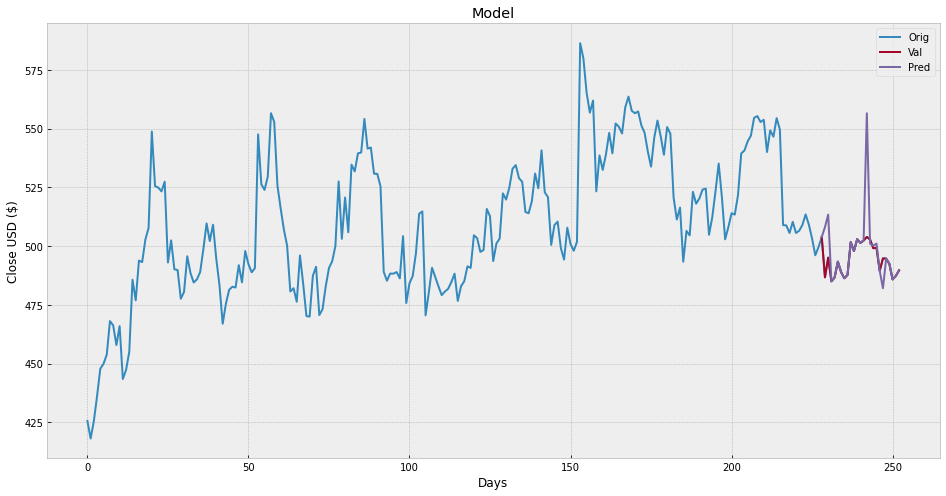

In [21]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


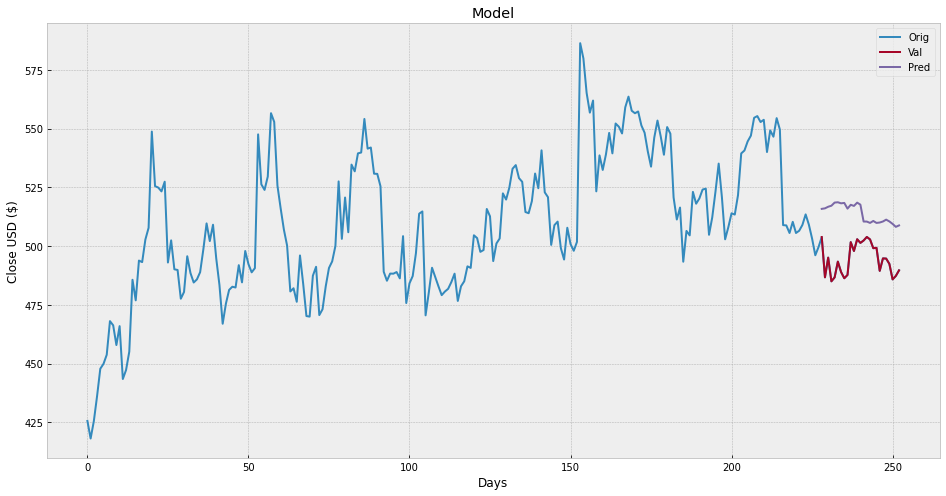

In [22]:
#Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()